# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
training_set= pd.read_csv("Facebook_Ads_2.csv", encoding="ISO-8859-1")

In [3]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
training_set.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# STEP #2: EXPLORE/VISUALIZE DATASET

In [5]:
click=training_set[training_set.Clicked==1]
no_click=training_set[training_set.Clicked==0]

In [6]:
no_click

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [7]:
print('Total=', len(training_set))
print('Number of customers who clicked on A-',len(click))
print("number of customer didn't click-", len(no_click))

Total= 499
Number of customers who clicked on A- 250
number of customer didn't click- 249


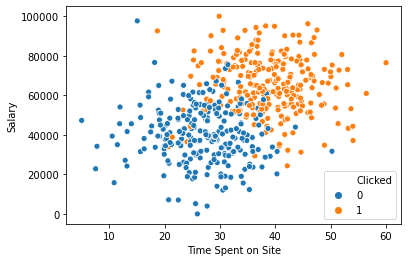

In [8]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue='Clicked', data=training_set)

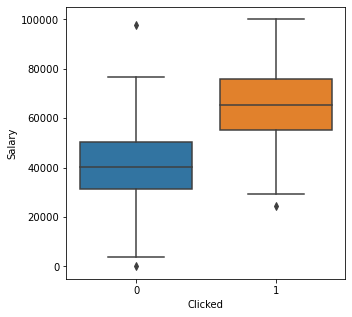

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked', y='Salary', data=training_set)

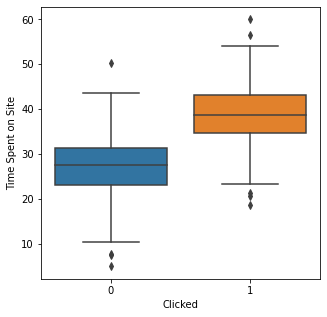

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked', y='Time Spent on Site', data=training_set)

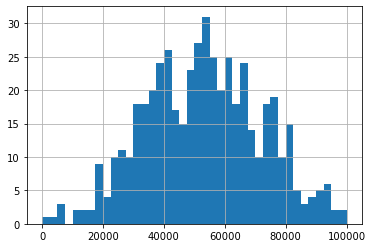

In [11]:
training_set['Salary'].hist(bins=40)

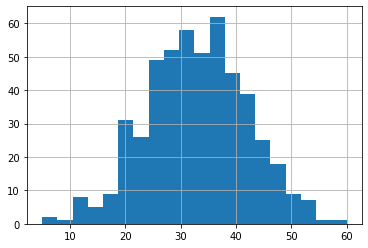

In [12]:
training_set['Time Spent on Site'].hist(bins=20)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [13]:
training_set

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [14]:
#Let's drop the emails, country and names (we can make use of the country later!)
training_set.drop(['Names','emails','Country'], axis=1, inplace=True)

In [15]:
training_set

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [16]:
#Let's drop the target coloumn before we do train test split
X=training_set.drop('Clicked', axis=1)
Y= training_set.Clicked

In [17]:
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


In [18]:
X.shape

(499, 2)

In [19]:
type(X)

pandas.core.frame.DataFrame

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [21]:
X

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

# STEP#4: MODEL TRAINING

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=30)

In [23]:
X_train

array([[-3.48394024e-01,  3.48103203e-02],
       [ 5.22730195e-01,  4.81677546e-01],
       [-9.33146206e-01, -1.68487057e+00],
       [-3.44246932e-02, -5.59481339e-02],
       [-3.86929102e-01, -1.11683559e-01],
       [-8.89786073e-01, -5.15023719e-01],
       [ 3.74335737e-01,  1.24675686e+00],
       [-2.40954941e-01,  7.44605776e-01],
       [ 9.27987041e-01,  1.06803889e+00],
       [-9.22546096e-01, -4.36985573e-02],
       [-7.59855841e-01, -8.40723148e-01],
       [ 4.50249526e-01,  1.06273571e+00],
       [-2.40764550e-01, -3.10185529e-01],
       [-1.69821011e+00, -6.02685912e-01],
       [-8.36244919e-01,  1.55798548e+00],
       [ 3.33987204e-01, -1.53998204e+00],
       [ 7.67911699e-01,  7.06197711e-01],
       [ 3.19541628e-01, -7.48136618e-01],
       [-6.06572433e-01, -2.56770275e-01],
       [ 2.62399033e-01, -2.13904662e+00],
       [-1.14994093e+00, -2.41675560e+00],
       [-5.62486322e-01, -7.50962168e-01],
       [-8.27867118e-01, -2.76806472e-01],
       [ 9.

In [24]:
X_train.shape

(399, 2)

In [25]:
y_train

433    0
482    1
264    0
159    1
440    0
      ..
140    0
301    0
429    0
421    1
293    0
Name: Clicked, Length: 399, dtype: int64

In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

# STEP#5: MODEL TESTING

In [27]:
y_predict_train=classifier.predict(X_train)

In [28]:
y_predict_train

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [29]:
y_train

433    0
482    1
264    0
159    1
440    0
      ..
140    0
301    0
429    0
421    1
293    0
Name: Clicked, Length: 399, dtype: int64

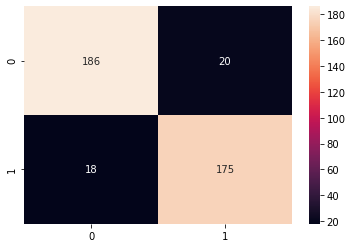

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='d')

In [31]:
cm

array([[186,  20],
       [ 18, 175]], dtype=int64)

In [55]:
# Predicting on testing data
y_predict_test=classifier.predict(X_test)
y_predict_test

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

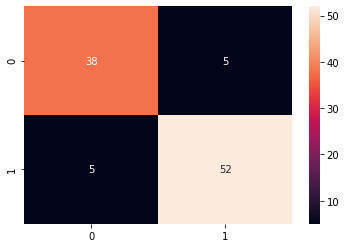

In [56]:
cm= confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')

In [57]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.91      0.91      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

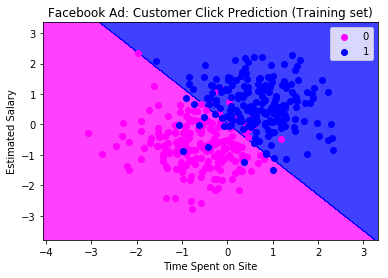

In [30]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


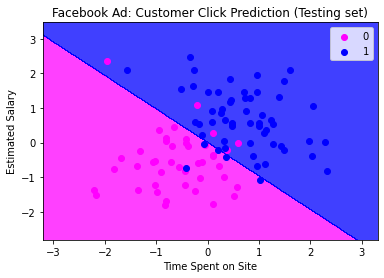

In [58]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()